#  Theorical Questions

<b> Q: What is the validation method used in the example template? Considering the dataset is a bit small, is it an appropriate approach? 
If not, what would you suggest? (you are not expected to change but you are allowed to do that if you want) </b><br />
<b>A</b>: In the currrent exampe template, a train-test split validation is being used. 
    The train-test split procedure is appropriate when you have a very large dataset, 
    a costly model to train, or require a good estimate of model performance quickly. For a smaller dataset 
    the train-test validation technique can cause overfitting. <br />
    
This is where k-fold cross-validation comes in. It splits the data into k folds, then trains the data 
on k-1 folds and test on the one fold that was left out. It does this for all combinations and averages 
the result on each instance.

![](k-fold-validation.png)

source: https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7

<b> Q: What is the default model in the template? Is it a good one for image data? why? </b><br />
<b>A</b>: The default model used in the template is Artificial Neural Network (ANN).

With ANN, concrete data points must be provided. For example, in a model where we are trying to distinguish between dogs and cats, the width of the noses and length of the ears must be explicitly provided as data points.

When using CNN, these spatial features are extracted from image input. This makes CNN ideal when thousands of features need to be extracted. Instead of having to measure each individual feature, CNN gathers these features on its own.

Using ANN, image classification problems become difficult because 2-dimensional images need to be converted to 1-dimensional vectors. This increases the number of trainable parameters exponentially. Increasing trainable parameters takes storage and processing capability.

In other words, it would be expensive. Compared to its predecessors, the main advantage of CNN is that it automatically detects the important features without any human supervision. This is why CNN would be an ideal solution to computer vision and image classification problems.

![](neural-networks.png)

source: https://viso.ai/deep-learning/ann-and-cnn-analyzing-differences-and-similarities/ <br />
source: https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/

<b> Q: Convolution neural network address what issues of a fully connected neural network and how? </b><br />
<b>A</b>:  Both convolution neural networks and neural networks have learn able weights and biases. In both networks the neurons receive some input, perform a dot product and follows it up with a non-linear function like ReLU(Rectified Linear Unit).

When it comes to classifying images — lets say with size 64x64x3 — fully connected layers need 12288 weights in the
first hidden layer! The number of weights will be even bigger for images with size 225x225x3 = 151875. Networks having large number of parameter face several problems, for e.g. slower training time and chances of overfitting.

The main functional difference of convolution neural network is that, the main image matrix is reduced to a matrix of lower dimension in the first layer itself through an operation called Convolution. For e.g. an image of 64x64x3 can be reduced to 1x1x10. Following which subsequent operations are performed.

A CNN usually consists of input layer, convolution layer, Rectified Linear Unit, Maxpool and Fully Connected Layer. Unlike the fully connected neural network, the above mentioned layers reduce the size of the matrix without compromising on the important features.

source: https://medium.datadriveninvestor.com/convolution-neural-networks-vs-fully-connected-neural-networks-8171a6e86f15

<b> Q: What's the different between 1d, 2d, and 3d convolution? </b><br />
<b>A</b>: Each convolution (1d, 2d and 3d) have a different convolutional direction & output shape.

![](cnn-summary.png)

Therefore: <br />
In 1D CNN, kernel moves in 1 direction. Input and output data of 1D CNN is 2 dimensional. Mostly used on Time-Series data. <br />
In 2D CNN, kernel moves in 2 directions. Input and output data of 2D CNN is 3 dimensional. Mostly used on Image data.<br />
In 3D CNN, kernel moves in 3 directions. Input and output data of 3D CNN is 4 dimensional. Mostly used on 3D Image data (MRI, CT Scans, Video).<br/>

source: https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610 <br />
source: https://github.com/ifding/learning-notes/blob/master/machine-learning/1d-2d-and-3d-convolutions-in-cnn.md

<b> Q: What is the difference between convolution and pooling? </b><br />
<b>A</b>: Pooling is a fixed operation and convolution can be learned. On the other hand, pooling 
is a cheaper operation than convolution, both in terms of the amount of computation that you need
to do and number of parameters that you need to store (no parameters for pooling layer).

source: https://medium.com/analytics-vidhya/deep-learning-methods-1700548a3093

# Chest X-Ray images to predict COVID-19 positive or negative

In [19]:
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np

y_train = pd.read_csv('y_train.csv')
y_train.tail()
positive_cases = y_train.query('infection == 1')
negative_cases = y_train.query('infection == 0')

In [24]:
positive_cases

,id,infection
0,0,1
1,1,1
2,2,1
4,4,1
5,5,1
...,...,...
482,482,1
483,483,1
484,484,1
485,485,1


In [21]:
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np

# Load image data in the numpy arrays.
# TRAIL 1: Normally, images are RGB, which means they have 3 channels, one for red, 
#          one for green and one for blue. If we have an L mode image, that means it is
#          a single channel image - normally interpreted as greyscale. The L means that is just
#          stores the Luminance. It is very compact, but only stores a greyscale, not colour.
# OUTPUT:  The accuracy has increase from 65.31% to 72.79%.
def load_data(folder):
    images = []
    for file in tqdm(os.listdir(folder)):
        file_id = file.replace('.png', '')
        image = Image.open(
            os.path.join(folder, file)
        ).convert('RGB').resize((256, 256))
        arr = np.array(image)
        images.append(
            (int(file_id), arr)
        )
    images.sort(key=lambda i: i[0])
    return np.array([v for _id, v in images])

x_train = load_data('train')
y_train = pd.read_csv('y_train.csv')['infection']

  0%|          | 0/487 [00:00<?, ?it/s]

In [23]:
x_train


array([[[[217, 217, 217],
         [216, 216, 216],
         [216, 216, 216],
         ...,
         [ 11,  11,  11],
         [ 11,  11,  11],
         [ 12,  12,  12]],

        [[239, 239, 239],
         [238, 238, 238],
         [239, 239, 239],
         ...,
         [ 11,  11,  11],
         [ 11,  11,  11],
         [ 12,  12,  12]],

        [[236, 236, 236],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        ...,

        [[213, 213, 213],
         [203, 203, 203],
         [196, 196, 196],
         ...,
         [175, 175, 175],
         [158, 158, 158],
         [144, 144, 144]],

        [[215, 215, 215],
         [203, 203, 203],
         [201, 201, 201],
         ...,
         [170, 170, 170],
         [156, 156, 156],
         [147, 147, 147]],

        [[210, 210, 210],
         [208, 208, 208],
         [209, 209, 209],
         ...,
         [162, 162, 162],
        

In [10]:
x_train.shape

(487, 256, 256, 3)

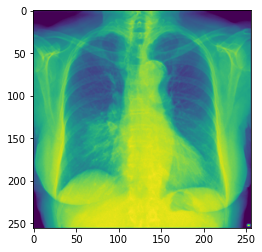

In [2]:
# check image 
import matplotlib.pyplot as plt
plt.imshow(x_train[320, :, :, 2])

# Applying Keras Models

### Functional API Model

In [2]:
# There are three ways to create Keras models:
# a) Functional API Model
# b) Sequential Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input


# Trail 2: Functional API Model. The Functional API model can be 
# used to create rescidual neural networks when needed. Also, here we are tryign to use
# the relu activation function as it will be faster to implement.
def build():
    img_in = Input(shape=(256, 256, 3))
    flattened = Flatten()(img_in)
    fc1 = Dense(64, activation='relu')(flattened)
    # Drop out will help reduce over-fitting by removing 
    # random nodes.
    fc2 = Dropout(0.3)(fc1)
    fc3 = Dense(32, activation='relu')(fc2)
    fc4 = Dropout(0.3)(fc3)
    output = Dense(1, activation = 'sigmoid')(fc4)
    model = tf.keras.Model(inputs=img_in, outputs=output)
    return model

model = build()
model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        )

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                12582976  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33    

### Sequential Model

In [4]:
# Trail 3: Sequential Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

model = Sequential()
model.add(Conv2D(64, 3, 3, input_shape=(256, 256, 3)))
model.output_shape
model.add(Flatten())
model.output_shape
model.add(Dense(64, activation='relu', input_shape=(16,))),
model.add(Dense(32, activation='relu')),
model.add(Dense(1, activation='softmax')),


model.summary()


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 85, 64)        1792      
_________________________________________________________________
flatten_2 (Flatten)          (None, 462400)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                29593664  
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 29,597,569
Trainable params: 29,597,569
Non-trainable params: 0
_________________________________________________________________


# Convocational Neural Network

In [17]:
#Importing required libraries.
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers

In [5]:
#Initializing the CNN
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image
classifier.add(Convolution2D(64,3,3, input_shape=(256,256,3), activation='relu'))
#64 (or 32) Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines

In [6]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
#step -3 Flattening
classifier.add(Flatten())

In [8]:
#step-4 Full connection step
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(126, activation = 'relu'))
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
#binary outcome

In [9]:
#compiling the cnn
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [16]:
epochs = 130
batch_size = 32

# history = model.fit(x = x_train,
#                     y = y_train,
#                     batch_size = batch_size,
#                     validation_split=0.3,
#                     epochs=epochs
#                     )

classifier.fit(x_train, 
                y_train, 
                epochs=epochs,
                verbose=2, 
                shuffle=True, 
                class_weight=None)

Epoch 1/130
16/16 - 1s - loss: 0.0834 - accuracy: 0.9754
Epoch 2/130
16/16 - 1s - loss: 0.0730 - accuracy: 0.9692
Epoch 3/130
16/16 - 1s - loss: 0.0761 - accuracy: 0.9733
Epoch 4/130
16/16 - 1s - loss: 0.0819 - accuracy: 0.9692
Epoch 5/130
16/16 - 1s - loss: 0.0249 - accuracy: 0.9938
Epoch 6/130
16/16 - 1s - loss: 0.0247 - accuracy: 0.9938
Epoch 7/130
16/16 - 1s - loss: 0.0505 - accuracy: 0.9897
Epoch 8/130
16/16 - 1s - loss: 0.0210 - accuracy: 0.9938
Epoch 9/130
16/16 - 1s - loss: 0.0094 - accuracy: 1.0000
Epoch 10/130
16/16 - 1s - loss: 0.0056 - accuracy: 1.0000
Epoch 11/130
16/16 - 1s - loss: 0.0044 - accuracy: 1.0000
Epoch 12/130
16/16 - 1s - loss: 0.0033 - accuracy: 1.0000
Epoch 13/130
16/16 - 1s - loss: 0.0037 - accuracy: 1.0000
Epoch 14/130
16/16 - 1s - loss: 0.0025 - accuracy: 1.0000
Epoch 15/130
16/16 - 1s - loss: 0.0022 - accuracy: 1.0000
Epoch 16/130
16/16 - 1s - loss: 0.0019 - accuracy: 1.0000
Epoch 17/130
16/16 - 1s - loss: 0.0019 - accuracy: 1.0000
Epoch 18/130
16/16 - 1s

In [18]:
x_test = load_data('test')

y_test = classifier.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('report.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]